In [323]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [324]:
titanic=pd.read_csv("titanic_train.csv")
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [325]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [326]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### age,Cabin列存在缺失值

In [327]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())  # 填补Age类的缺失值

In [328]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [329]:
# 由于Sex列的属性都是字符串类型,所以应该转化为数字类型方便后续的处理
titanic["Sex"].unique()  # 先查看这一列有多少不同的类别

array(['male', 'female'], dtype=object)

In [330]:
titanic.loc[titanic["Sex"]=="male","Sex"]=0
titanic.loc[titanic["Sex"]=="female","Sex"]=1

In [331]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [332]:
titanic["Embarked"].unique() # 对于即存在缺失值又是字符串类型的数据的处理

array(['S', 'C', 'Q', nan], dtype=object)

In [333]:
titanic["Embarked"].value_counts() # S最多那么用S来填充缺失的列

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [334]:
titanic["Embarked"]=titanic["Embarked"].fillna('S')

In [335]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [336]:
titanic.loc[titanic["Embarked"]=='S','Embarked']=0
titanic.loc[titanic["Embarked"]=='C','Embarked']=1
titanic.loc[titanic["Embarked"]=='Q','Embarked']=2

In [337]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0


In [338]:
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import KFold

In [339]:
## 选出需要用来预测结果的 特征变量
predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [340]:
alg=LinearRegression()

In [341]:
kf=KFold(n_splits=3) # 进行3折交叉验证

In [342]:
predictions=[]
for train,test in kf.split(titanic):
    train_predictors=(titanic[predictors].iloc[train,:])
    train_target=titanic["Survived"].iloc[train]
    alg.fit(train_predictors,train_target)
    test_predictions=alg.predict(titanic[predictors].iloc[test,:])
    predictions.append(test_predictions)

In [343]:
predictions

[array([ 8.99877810e-02,  9.60756206e-01,  5.92676278e-01,  9.31138728e-01,
         5.29343071e-02,  1.70275685e-01,  3.69943590e-01,  1.03474847e-01,
         5.21597906e-01,  8.74491050e-01,  6.48883611e-01,  8.29742769e-01,
         1.34797198e-01, -1.61126844e-01,  6.58141307e-01,  6.39819748e-01,
         1.51733875e-01,  2.95432718e-01,  5.35377959e-01,  6.21007683e-01,
         2.61872592e-01,  2.62687561e-01,  7.31739160e-01,  5.05995897e-01,
         5.61398567e-01,  3.35039734e-01,  1.30338808e-01,  4.68765767e-01,
         6.60737753e-01,  9.10819218e-02,  4.77223920e-01,  1.04220026e+00,
         6.60691613e-01,  8.71539273e-02,  5.28550732e-01,  4.01874338e-01,
         1.30340307e-01,  1.29339672e-01,  5.72717129e-01,  6.65238822e-01,
         4.83215779e-01,  7.60807408e-01,  1.30578363e-01,  8.71867121e-01,
         7.09855487e-01,  9.11369897e-02,  1.39181745e-01,  6.60691613e-01,
         6.82833485e-02,  6.06254374e-01,  4.92254383e-02,  1.29250392e-01,
         9.0

In [344]:
predictions=np.concatenate(predictions,axis=0)

In [345]:
predictions.shape

(891,)

In [346]:
predictions[predictions>0.5]=1
predictions[predictions<0.5]=0

In [347]:
predictions

array([0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 1.,
       0., 0., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0.,
       0., 0., 0., 0., 0.

In [348]:
accuracy=sum(predictions[predictions==titanic["Survived"]])/len(predictions)

In [349]:
accuracy

0.2615039281705948

#### 回归算法效果不太行

In [350]:
from sklearn.ensemble import RandomForestClassifier

In [351]:
predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]

In [352]:
# n_estimators=10 森林中树的个数
alg=RandomForestClassifier(random_state=1,n_estimators=10,min_samples_split=2,min_samples_leaf=1) #min_samples_split=2,min_samples_leaf=1 划分叔的停止条件

In [353]:
kf=KFold(n_splits=3) # 进行3折交叉验证

In [355]:
from sklearn import model_selection

In [356]:
scores=model_selection.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)

In [357]:
scores.mean()

0.7878787878787877

In [358]:
alg=RandomForestClassifier(random_state=1,n_estimators=50,min_samples_split=4,min_samples_leaf=2)
kf=KFold(n_splits=3)
scores=model_selection.cross_val_score(alg,titanic[predictors],titanic["Survived"],cv=kf)
scores.mean()

0.8159371492704826

In [359]:
### 如果此时给预测数据多增加一些特征呢？
titanic["Famliy_size"]=titanic["SibSp"]+titanic["Parch"] 
titanic["Name_size"]=titanic["Name"].apply(lambda x:len(x))

#### 看看哪个特征最重要

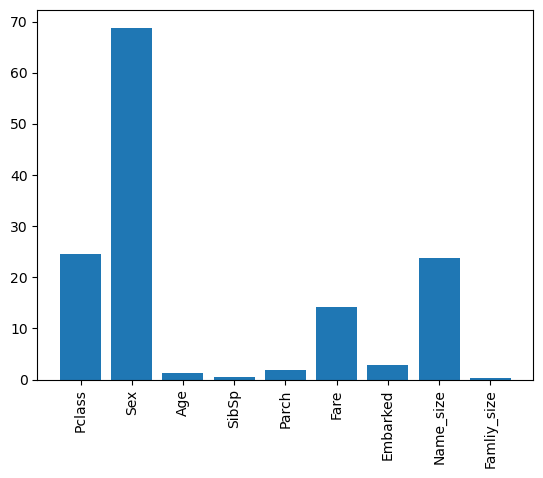

In [360]:
from sklearn.feature_selection import SelectKBest,f_classif
predictors=["Pclass","Sex","Age","SibSp","Parch","Fare","Embarked","Name_size","Famliy_size"]
selector=SelectKBest(f_classif,k=5)
selector.fit(titanic[predictors],titanic["Survived"])
scores=-np.log10(selector.pvalues_)
plt.bar(range(len(predictors)),scores)
plt.xticks(range(len(predictors)),predictors,rotation='vertical')
plt.show()